<a href="https://colab.research.google.com/github/bahadurshubham/Darknet/blob/master/Multiple_Linear_regression_with_different_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('sample_data/california_housing_train.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [2]:
df.corr()['total_bedrooms']

longitude             0.071802
latitude             -0.069373
housing_median_age   -0.320434
total_rooms           0.928403
total_bedrooms        1.000000
population            0.881169
households            0.980920
median_income        -0.013495
median_house_value    0.045783
Name: total_bedrooms, dtype: float64

In [3]:
from copy import deepcopy

bedrooms = df['total_bedrooms']
df = df.drop(['longitude', 'latitude', 'housing_median_age','total_bedrooms' , 'median_income', 'median_house_value'], axis=1)
df['bedrooms'] = bedrooms
df

,total_rooms,population,households,bedrooms
0,5612.0,1015.0,472.0,1283.0
1,7650.0,1129.0,463.0,1901.0
2,720.0,333.0,117.0,174.0
3,1501.0,515.0,226.0,337.0
4,1454.0,624.0,262.0,326.0
...,...,...,...,...
16995,2217.0,907.0,369.0,394.0
16996,2349.0,1194.0,465.0,528.0
16997,2677.0,1244.0,456.0,531.0
16998,2672.0,1298.0,478.0,552.0


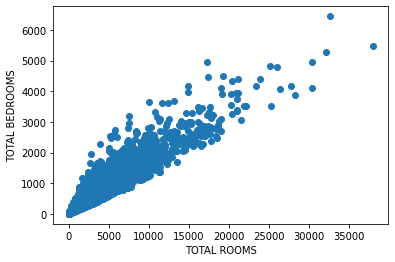

In [4]:
import matplotlib.pyplot as plt

plt.scatter(df['total_rooms'], df['bedrooms'])
plt.xlabel('TOTAL ROOMS')
plt.ylabel('TOTAL BEDROOMS')
plt.show()

In [5]:
df_np = df.to_numpy()
df_np.shape

(17000, 4)

In [6]:
X_train, Y_train = df_np[:, :3] , df_np[:, -1]
X_train.shape , Y_train.shape

((17000, 3), (17000,))

In [7]:
from sklearn.linear_model import LinearRegression

sklearn_model = LinearRegression().fit(X_train , Y_train)
sklearn_y_predictions = sklearn_model.predict(X_train)
sklearn_y_predictions

array([631.82986004, 693.11956219, 130.849378  , ..., 502.56126019,
       522.07260277, 304.4499167 ])

In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mean_absolute_error(sklearn_y_predictions,Y_train), mean_squared_error(sklearn_y_predictions, Y_train)

(39.672217650706656, 5650.631822167879)

In [9]:
predictions_df = pd.DataFrame({'Population' : df['population'],
                               'Households': df['households'],
                               'Total Rooms': df['total_rooms'],
                               'Bedrooms': df['bedrooms'],
                               'Sklearn Room Predictions' : sklearn_y_predictions})

predictions_df

,Population,Households,Total Rooms,Bedrooms,Sklearn Room Predictions
0,1015.0,472.0,5612.0,1283.0,631.829860
1,1129.0,463.0,7650.0,1901.0,693.119562
2,333.0,117.0,720.0,174.0,130.849378
3,515.0,226.0,1501.0,337.0,259.462982
4,624.0,262.0,1454.0,326.0,289.315311
...,...,...,...,...,...
16995,907.0,369.0,2217.0,394.0,412.047168
16996,1194.0,465.0,2349.0,528.0,501.086730
16997,1244.0,456.0,2677.0,531.0,502.561260
16998,1298.0,478.0,2672.0,552.0,522.072603


In [10]:
def get_predictions(model, X):
  n, p_minus_one = X.shape     #Copying the numeral values of rows and columns of X matrix into n and p_minus_one
  p = p_minus_one + 1          # changing the values of p_minus_one to p_minus_one+1 so as to add onr column of np.ones     

  New_X = np.ones(shape=(n,p)) #creating a new matrix of ones of the same size 
  New_X[:, 1:] = X              #copying all the values from the X matrix into the new matrix formed so as tho follow the rule of matrix multiplication

  return np.dot(New_X, model)

In [11]:
test_model = np.array([1/10, 3/10, 2/10, 1/10])
get_predictions(test_model, X_train)

array([1933.9, 2567.2,  294.4, ..., 1097.6, 1109.1,  734.3])

In [12]:
predictions_df['Test Predictions'] = get_predictions(test_model, X_train)
predictions_df

,Population,Households,Total Rooms,Bedrooms,Sklearn Room Predictions,Test Predictions
0,1015.0,472.0,5612.0,1283.0,631.829860,1933.9
1,1129.0,463.0,7650.0,1901.0,693.119562,2567.2
2,333.0,117.0,720.0,174.0,130.849378,294.4
3,515.0,226.0,1501.0,337.0,259.462982,576.0
4,624.0,262.0,1454.0,326.0,289.315311,587.3
...,...,...,...,...,...,...
16995,907.0,369.0,2217.0,394.0,412.047168,883.5
16996,1194.0,465.0,2349.0,528.0,501.086730,990.1
16997,1244.0,456.0,2677.0,531.0,502.561260,1097.6
16998,1298.0,478.0,2672.0,552.0,522.072603,1109.1


In [13]:
from numpy.linalg import inv

def get_best_model(X, Y):
  n, p_minus_one = X.shape
  p = p_minus_one + 1

  New_X = np.ones(shape=(n,p))
  New_X[: , 1:] = X

  return np.dot(np.dot(inv(np.dot(New_X.T, New_X)), New_X.T), Y)

In [14]:
best_model = get_best_model(X_train, Y_train)
predictions_df['Best Model'] = get_predictions(best_model, X_train)
predictions_df

,Population,Households,Total Rooms,Bedrooms,Sklearn Room Predictions,Test Predictions,Best Model
0,1015.0,472.0,5612.0,1283.0,631.829860,1933.9,631.829860
1,1129.0,463.0,7650.0,1901.0,693.119562,2567.2,693.119562
2,333.0,117.0,720.0,174.0,130.849378,294.4,130.849378
3,515.0,226.0,1501.0,337.0,259.462982,576.0,259.462982
4,624.0,262.0,1454.0,326.0,289.315311,587.3,289.315311
...,...,...,...,...,...,...,...
16995,907.0,369.0,2217.0,394.0,412.047168,883.5,412.047168
16996,1194.0,465.0,2349.0,528.0,501.086730,990.1,501.086730
16997,1244.0,456.0,2677.0,531.0,502.561260,1097.6,502.561260
16998,1298.0,478.0,2672.0,552.0,522.072603,1109.1,522.072603


In [15]:
mean_absolute_error(predictions_df['Best Model'], Y_train)

39.67221765070596